In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
red_wine_url = "https://raw.githubusercontent.com/nishilp/DataScience01/master/Data/red_wine.csv"
white_wine_url = "https://raw.githubusercontent.com/nishilp/DataScience01/master/Data/white_wine.csv"

In [3]:
# Get two datasets, one for red wine and other for white wine

red= pd.read_csv(red_wine_url)
white = pd.read_csv(white_wine_url)

In [4]:
# checking the dataframes of red wine dataset using head() method

red.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,red


In [5]:
# checking the dataframes of white wine dataset using head() method

white.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,0,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,0,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,0,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,0,white


In [6]:
# Merge both red and white wine datasets into one

frames = [red, white]
ds = pd.concat(frames)

In [7]:
# Check for no. of duplicate records

sum(ds.duplicated())

1177

In [8]:
# Remove the duplicate records using drop_duplicates() method

ds = ds.drop_duplicates()

In [9]:
# Check total number of rows and columns. This frame has 5320 rows and 14 columns

ds.shape

(5320, 14)

In [10]:
# Check rows with missing attribute values

ds.isnull().sum(axis=0)

# No missing attributes so no drop or filling required

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good                    0
color                   0
dtype: int64

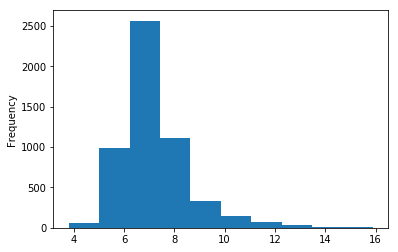

In [11]:
# Plotting few important columns
ds['fixed acidity'].plot(kind='hist')

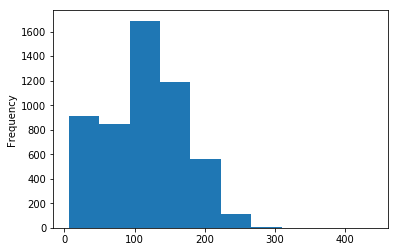

In [12]:
ds['total sulfur dioxide'].plot(kind='hist')

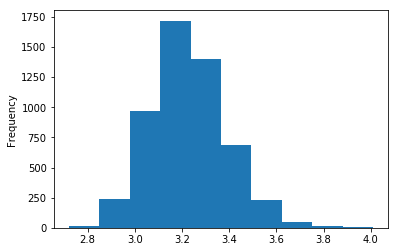

In [13]:
ds['pH'].plot(kind='hist')

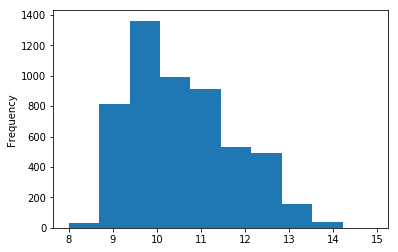

In [14]:
ds['alcohol'].plot(kind='hist')

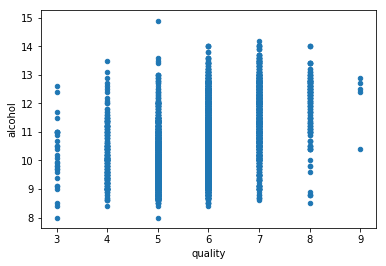

In [15]:
# Alcohol seems to have the most impact on the quality of wine
# Scatter plot alcohol vs quality

ds.plot(x='quality', y='alcohol', kind='scatter')

In [16]:
# Let us try to group data and aggregate information for all columns. For example finding mean values for all qualities

ds.groupby('quality').mean()

# Below observation clearly shows wines with alcohol% > 11 is classified as good wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
quality,,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000,0
4,7.304369,0.462379,0.271505,4.034951,0.060510,20.332524,101.516990,0.994802,3.235874,0.507476,10.215049,0
5,7.333248,0.393970,0.305845,5.481906,0.066039,29.797660,119.572203,0.995734,3.214275,0.529041,9.872211,0
6,7.169027,0.315626,0.324671,5.153142,0.054366,30.777873,114.433491,0.994377,3.224120,0.534313,10.649060,0
7,7.122021,0.292342,0.336040,4.171320,0.045218,29.977220,105.157126,0.992838,3.240479,0.549638,11.511020,1
8,6.820270,0.302973,0.340541,4.771622,0.040385,33.108108,111.976351,0.992130,3.239595,0.519054,11.912162,1
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000,1


In [17]:
# Splitting the dataset further based on the color of wine

ds.groupby(['quality','color']).mean()

# This also shows that majority of good wines have lesser 'volatile acidity' and 'chlorides'

fixed acidity  volatile acidity  citric acid  residual sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.139869          0.382157     0.305229        4.499346   
5       red         8.171231          0.578596     0.244523        2.509532   
        white       6.921745          0.303306     0.335957        6.941532   
6       red         8.337383          0.496084     0.279364        2.457290   
        white       6.819435          0.261630     0.338227        5.959787   
7       red         8.858683          0.403653     0.371856        2.716766   
        white       6.701089          0.265363     0.327358        4.523875   
8       red         8.441176          0.427647     0.382941        2.576471   
        white       6.609924          0.286794     0.335038        5.056489   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050059            23.127451            124.127451  0.994199   
5       red     0.093971            17.161179             57.406412  0.997082   
        white   0.052323            36.002979            150.099574  0.995072   
6       red     0.085075            15.637383             40.816822  0.996565   
        white   0.045178            35.308166            136.460850  0.993722   
7       red     0.076832            13.994012             35.449102  0.996051   
        white   0.037556            33.851234            122.052975  0.992059   
8       red     0.068353            13.764706             34.470588  0.995095   
        white   0.036756            35.618321            122.034351  0.991745   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  good  
quality color                                        
3       red    3.398000   0.570000   9.955000     0  
        white  3.187500   0.474500  10.345000     0  
4       red    3.381509   0.596415  10.265094     0  
        white  3.185425   0.476667  10.197712     0  
5       red    3.300815   0.623570   9.888562     0  
        white  3.171779   0.482621   9.864182     0  
6       red    3.318000   0.674542  10.658879     0  
        white  3.196029   0.492355  10.646122     0  
7       red    3.290060   0.742635  11.491118     1  
        white  3.228462   0.502859  11.515844     1  
8       red    3.274118   0.774706  12.158824     1  
        white  3.235115   0.485878  11.880153     1  
9       white  3.308000   0.466000  12.180000     1

In [18]:
# We can find which color wine is associated with higher quality using mean()

ds.groupby('color')['quality'].mean()

# For this dataset, white wine is associated with higher quality

color
red      5.623252
white    5.854835
Name: quality, dtype: float64

In [19]:
# Using describe() method we can output properties of attributes

ds.groupby('color').describe()

alcohol                                                  chlorides  \
        count       mean       std  min  25%   50%   75%   max     count   
color                                                                      
red    1359.0  10.432315  1.082065  8.4  9.5  10.2  11.1  14.9    1359.0   
white  3961.0  10.589358  1.217076  8.0  9.5  10.4  11.4  14.2    3961.0   

                 ...  total sulfur dioxide        volatile acidity            \
           mean  ...                   75%    max            count      mean   
color            ...                                                           
red    0.088124  ...                  63.0  289.0           1359.0  0.529478   
white  0.045905  ...                 166.0  440.0           3961.0  0.280538   

                                               
            std   min   25%   50%   75%   max  
color                                          
red    0.183031  0.12  0.39  0.52  0.64  1.58  
white  0.103437  0.08  0.21  0.26  0.33  1.10  

[2 rows x 104 columns]

In [20]:
# Question: Do sweeter wine gets better rating ? Lets find out

low_sugar = ds[ds['residual sugar'] < 3] 
high_sugar = ds[ds['residual sugar'] >= 3]

# This shows that high sugar wine has slightly higher quality

In [21]:
low_sugar['quality'].mean() 

5.793610911701364

In [22]:
high_sugar['quality'].mean() 

5.797947908445146

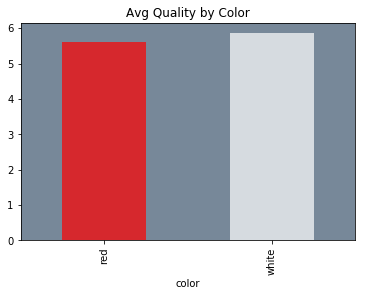

In [23]:
# Creating Visualizations to show wine quality associations with other properties
# ABOUT--- Q1: Is a certain type of wine (red or white) associated with higher quality?:


ax = ds.groupby('color')['quality'].mean().plot(kind='bar', title='Avg Quality by Color', color = ['red', 'white'] , alpha=0.7)
ax.set_facecolor("lightslategray")